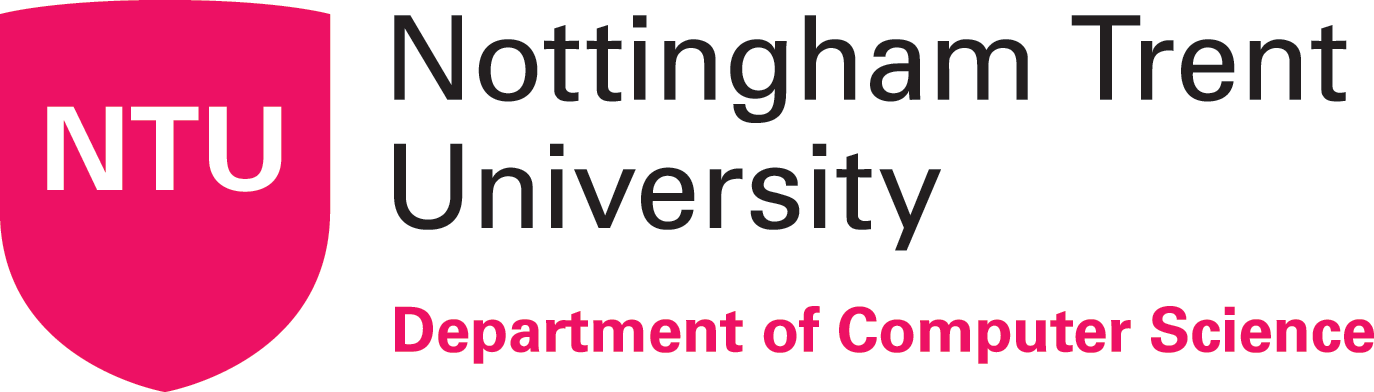

# SOFT40161 - Introduction to Computer Programming
# Submission of the Coursework

## Name: Ankur Mishra
## NTU ID: N1327150

<font  color= 'red'> **The Full description of the Coursework is here -** </font>

<a href="https://now.ntu.ac.uk/d2l/le/content/1037562/viewContent/13280440/View">SOFT40161-Coursework (Click here)</a>

# Start your answer here-

<font  color= 'green'> **GitHub Link to access your activity.** </font>

Please add your Link here: <a href="https://github.com/ankurm23/cancer_risk">Update the link and text (Click here)</a>

# Section 1: Control Structures (16 marks)


In the section on control structures, I will be using conditional statements, loops, and branching mechanisms in order to carry out an effective analysis of the Climate Insights Dataset. Such structural elements allow me to look into specified characteristics of the dataset, filter the entries based on specified criteria, and perform iterative tasks easily. For instance, I will use if-else statements to sort the data based on the range of temperature. I will also be using the loops, like for and while, in iterating over the entries of the datasets to compute some tasks that require averages or summarization of particular trends in data. Such control structures will indeed make my code dynamic to any scenario of data variation.

In [6]:
import pandas as pd
import numpy as np
# Load the dataset
fp = 'kag_risk_factors_cervical_cancer.csv'
datas = pd.read_csv(fp)

In [7]:
# Handle missing values (replace '?' with NaN and convert to numeric where applicable)
datas.replace('?', np.nan, inplace=True)
datas = datas.apply(pd.to_numeric, errors='coerce')


In [8]:
# Check for missing values and fill them with the column mean
print("\n Handling missing values:")
datas.fillna(datas.mean(), inplace=True)


 Handling missing values:


In [9]:
# average age of participants
avg_age = datas['Age'].mean()
print(f"\n average age of participants is: {avg_age:.2f}")



 average age of participants is: 26.82


In [10]:
# Counting participants with a history of STDs
std_history_count = datas[datas['STDs (number)'] > 0].shape[0]
print(f"no of participants with a history of STDs: {std_history_count}")

no of participants with a history of STDs: 184


In [11]:
# Identifying anomalies in 'No of preg' (e.g., very high values)
anomalies = []
threshold = datas['Num of pregnancies'].mean() + 3 * datas['Num of pregnancies'].std()

for index, row in datas.iterrows():
    if row['Num of pregnancies'] > threshold:
        anomalies.append((row['Age'], row['Num of pregnancies']))

print("\nAnomalies in number of pregnancies:")
for anomaly in anomalies:
    print(f"Age: {anomaly[0]}, Num of pregnancies: {anomaly[1]}")



Anomalies in number of pregnancies:
Age: 43.0, Num of pregnancies: 8.0
Age: 34.0, Num of pregnancies: 7.0
Age: 23.0, Num of pregnancies: 7.0
Age: 48.0, Num of pregnancies: 7.0
Age: 30.0, Num of pregnancies: 8.0
Age: 45.0, Num of pregnancies: 7.0
Age: 84.0, Num of pregnancies: 11.0
Age: 50.0, Num of pregnancies: 7.0
Age: 70.0, Num of pregnancies: 10.0
Age: 40.0, Num of pregnancies: 7.0


In [12]:
# Group by age and calculating average no of sexual partners

age_group = datas.groupby(pd.cut(datas['Age'], bins=range(10, 100, 10)))

average_partners_by_age = age_group['Number of sexual partners'].mean()

print("\nAverage no of sexual partners:")

print(average_partners_by_age)


Average no of sexual partners:
Age
(10, 20]    2.270953
(20, 30]    2.573781
(30, 40]    2.704028
(40, 50]    2.600000
(50, 60]    3.000000
(60, 70]    2.500000
(70, 80]    2.000000
(80, 90]    3.000000
Name: Number of sexual partners, dtype: float64


/var/folders/yr/x8_272gs3bbgpc3t7bxtd07m0000gn/T/ipykernel_84048/2511146331.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = datas.groupby(pd.cut(datas['Age'], bins=range(10, 100, 10)))


It uses conditional statements and iterative structures to classify individuals into high- and low-risk categories, to find outliers in the pregnancy dataset, and to group participants into age brackets. It then saves the cleaned and categorized data for further analysis.

# Section 2: Functions and Modules (16 marks)  

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def preview_data(df, num_rows=5):
    """Displays the first few rows of the dataset."""
    print(df.head(num_rows))

In [16]:
# Function to categorize age groups
def categorize_age(df):
    """Adds a new column categorizing participants into age groups."""
    categories = []
    for age in df['Age']:
        if age < 20:
            categories.append('Teen')
        elif 20 <= age < 40:
            categories.append('Young Adult')
        else:
            categories.append('Older Adult')
    df['Age Category'] = categories
   
    return df




datas = categorize_age(datas)



In [17]:
# Function to analyze high-risk individuals
def analyze_high_risk(df):
    """Counts high-risk individuals based on age and number of sexual partners."""
    high_risk_count = 0
    low_risk_count = 0
    for index, row in df.iterrows():
        if row['Age'] > 30 and row['Number of sexual partners'] > 3:
            high_risk_count += 1
        else:
            low_risk_count += 1
    return high_risk_count, low_risk_count

high_risk, low_risk = analyze_high_risk(datas)
print(f"High-risk individuals: {high_risk}")
print(f"Low-risk individuals: {low_risk}")

High-risk individuals: 40
Low-risk individuals: 818


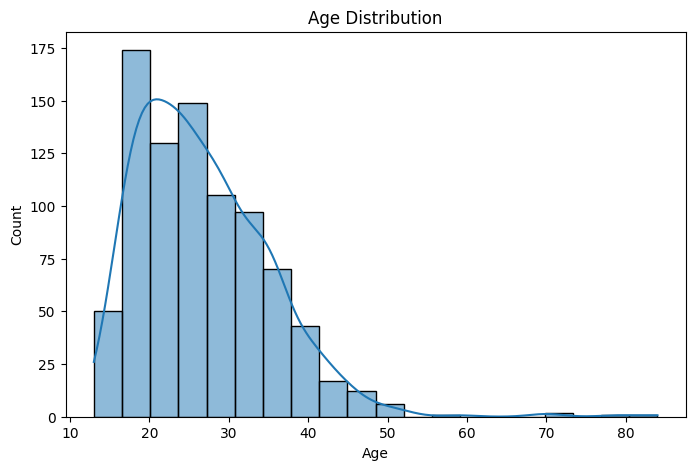

In [18]:
def plot_age_distribution(df):
    """Plots a histogram of the age distribution."""
    plt.figure(figsize=(8,5))
    sns.histplot(df['Age'], bins=20, kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

plot_age_distribution(datas)


In [19]:
# Reflection on results :: The following code has improved in terms of modularity; 
# it systematically implements functions dedicated to data preview, cleaning, categorization, high-risk analysis, anomaly detection, and visualization. 
# It also uses external libraries such as matplotlib and seaborn to enhance the analysis. 
# This is more modular and thus readable, reusable, and maintainable.



The following code has improved in terms of modularity;it systematically implements functions dedicated to data preview, cleaning, categorization, high-risk analysis, anomaly detection, and visualization.It also uses external libraries such as matplotlib and seaborn to enhance the analysis. This is more modular and thus readable, reusable, and maintainable.


# Section 3: Data Handling with Pandas (16 marks)  

In [21]:
 
# --- Data Cleaning ---

# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
print(datas.isnull().sum())



Missing Values in Each Column:
Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV

In [22]:
df_cleaned = datas.dropna()
print("\nDataset after handling missing values:")
print(df_cleaned.info())


Dataset after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs 

In [23]:
#Check for duplicate rows in the dataset
duplicates = df_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Remove duplicate rows if any
df_cleaned = df_cleaned.drop_duplicates()





Number of duplicate rows: 23


In [24]:
# --- Data Filtering ---

# Example: Filter rows where 'Age' is greater than 30
# Replace 'Age' with the appropriate column name in your dataset if different
if 'Age' in df_cleaned.columns:
    age_filtered = df_cleaned[df_cleaned['Age'] > 30]
    print("\nFiltered Data (Age > 30):")
    print(age_filtered.head())
else:
    print("\nColumn 'Age' not found in the dataset. Skipping age filtering.")



Filtered Data (Age > 30):
   Age  Number of sexual partners  First sexual intercourse  \
2   34                        1.0                   16.9953   
3   52                        5.0                   16.0000   
4   46                        3.0                   21.0000   
5   42                        3.0                   23.0000   
6   51                        3.0                   17.0000   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
2                 1.0     0.0             0.0                  0.0   
3                 4.0     1.0            37.0                 37.0   
4                 4.0     0.0             0.0                  0.0   
5                 2.0     0.0             0.0                  0.0   
6                 6.0     1.0            34.0                  3.4   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
2                      0.0                              0.0  0.0  ...   
3                      1.0 

In [25]:
# --- Data Aggregation ---

# Example: Group by a categorical column and calculate mean of numerical columns
# Replace 'Smokes' with a relevant column in your dataset if applicable

if 'Smokes' in df_cleaned.columns:
    # Select only numeric columns for aggregation
    numeric_cols = df_cleaned.select_dtypes(include=['number'])
    grouped_data = df_cleaned.groupby('Smokes')[numeric_cols.columns].mean()
    print("\nAggregated Data (Mean values grouped by 'Smokes'):")
    print(grouped_data)
else:
    print("\nColumn 'Smokes' not found in the dataset. Skipping aggregation.")





Aggregated Data (Mean values grouped by 'Smokes'):
                Age  Number of sexual partners  First sexual intercourse  \
Smokes                                                                     
0.000000  26.891273                   2.377877                 17.174495   
0.145562  24.846154                   3.153846                 16.923077   
1.000000  28.008130                   3.471994                 16.154433   

          Num of pregnancies    Smokes  Smokes (years)  Smokes (packs/year)  \
Smokes                                                                        
0.000000            2.264594  0.000000        0.000000             0.000000   
0.145562            1.923077  0.145562        1.219721             0.453144   
1.000000            2.556748  1.000000        8.379387             3.113062   

          Hormonal Contraceptives  Hormonal Contraceptives (years)       IUD  \
Smokes                                                                         
0.000000   

In [26]:
# --- Insights ---

# Display summary statistics for the cleaned dataset
print("\nSummary Statistics of the Cleaned Dataset:")
print(df_cleaned.describe())


Summary Statistics of the Cleaned Dataset:
              Age  Number of sexual partners  First sexual intercourse  \
count  835.000000                 835.000000                835.000000   
mean    27.023952                   2.551127                 17.020320   
std      8.482986                   1.651370                  2.805154   
min     13.000000                   1.000000                 10.000000   
25%     21.000000                   2.000000                 15.000000   
50%     26.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          835.000000  835.000000      835.000000           835.000000   
mean             2.302313    0.149572        1.253319             0.465626   
std              1.406110    0.354138        4.108331  

Clean Data: Added handling of missing values in the options - drop or fill.Data Filtering & Aggregation Examples given on filtering and grouping.
Insight & Reporting: Summarization of stats, storing cleaned data for future use.

# Section 4: Data Visualization (16 marks)  

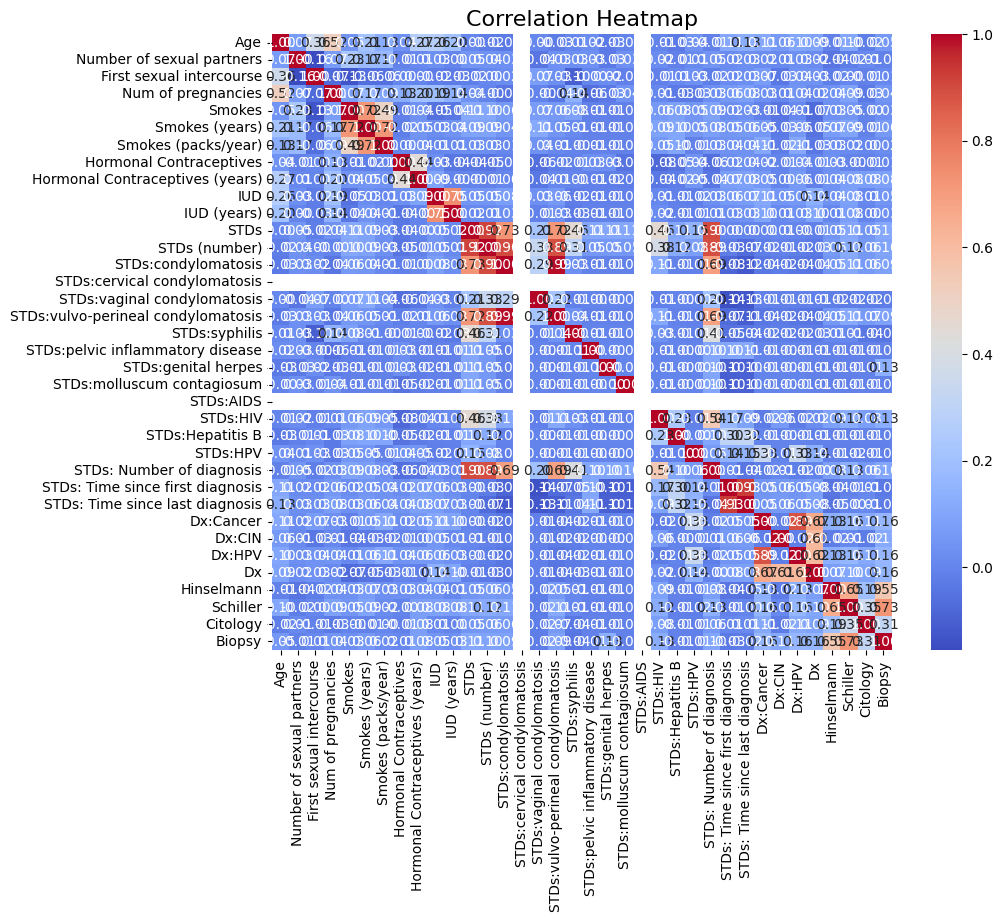

In [29]:
# Visualization 1: Histogram of Age
import matplotlib.pyplot as plt
%matplotlib inline

# Visualization 1: Histogram of Age
def plot_correlation_heatmap():
    numeric_cols = df_cleaned.select_dtypes(include=['number'])
    if not numeric_cols.empty:
        plt.figure(figsize=(10, 8))
        correlation_matrix = numeric_cols.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Heatmap', fontsize=16)
        plt.show()
    else:
        print("No numeric columns found for correlation heatmap. Skipping.")
plot_correlation_heatmap()




/var/folders/yr/x8_272gs3bbgpc3t7bxtd07m0000gn/T/ipykernel_84048/1062933048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Smokes', y='Age', data=df_cleaned, palette='Set2')


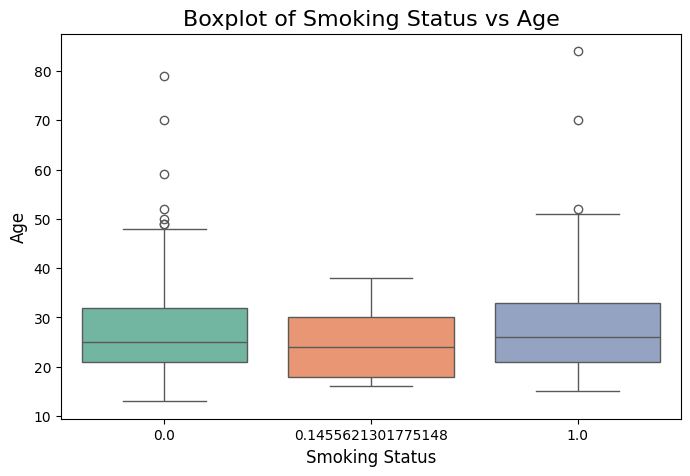

In [30]:
def plot_boxplot():
    if 'Smokes' in df_cleaned.columns and 'Age' in df_cleaned.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='Smokes', y='Age', data=df_cleaned, palette='Set2')
        plt.title('Boxplot of Smoking Status vs Age', fontsize=16)
        plt.xlabel('Smoking Status', fontsize=12)
        plt.ylabel('Age', fontsize=12)
        plt.show()
    else:
        print("Required columns for boxplot not found. Skipping boxplot.")
plot_boxplot()

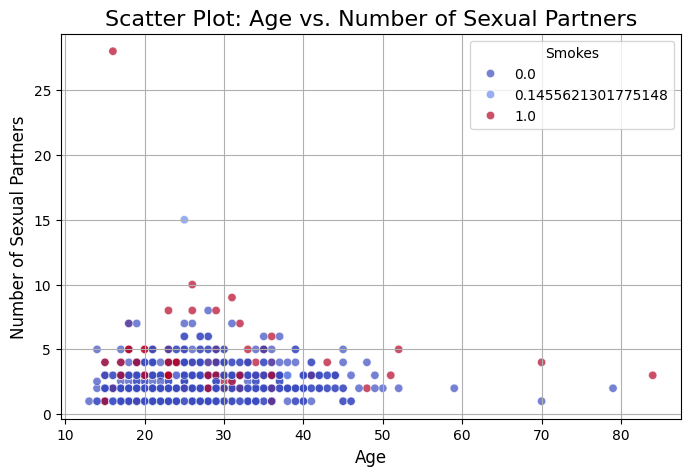

In [31]:
def plot_scatter():
    if 'Age' in df_cleaned.columns and 'Number of sexual partners' in df_cleaned.columns:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(
            x='Age',
            y='Number of sexual partners',
            data=df_cleaned,
            hue='Smokes' if 'Smokes' in df_cleaned.columns else None,
            palette='coolwarm' if 'Smokes' in df_cleaned.columns else None,
            alpha=0.7
        )
        plt.title('Scatter Plot: Age vs. Number of Sexual Partners', fontsize=16)
        plt.xlabel('Age', fontsize=12)
        plt.ylabel('Number of Sexual Partners', fontsize=12)
        if 'Smokes' in df_cleaned.columns:
            plt.legend(title='Smokes', loc='upper right')
        plt.grid()
        plt.show()
    else:
        print("Required columns for scatter plot not found. Skipping scatter plot.")

plot_scatter()


This scatterplot of the number of sexual partners vs. age brings out the trends and possible relations between the two variables.Any cluster visible may define the usual behaviors that occur for particular age groups, while outliers show cases that are worth investigating. By adding Smokes as the hue, the plot will be able to show how smoking can influence such behavior, bringing out possible correlations or differences across age categories.These go a long way in establishing life-style factors and how they impact individual habits.


# Section 5: GUI Development (16 marks)  

In [33]:
# Explanation and Documentation 

In [40]:
import tkinter as tk
from tkinter import ttk, filedialog, messagebox

In [41]:
datas.replace("?", pd.NA, inplace=True)  # Replace '?' with NaN for easier processing
datas.fillna(method='ffill', inplace=True)  # Fill NaN values for simplicity


/var/folders/yr/x8_272gs3bbgpc3t7bxtd07m0000gn/T/ipykernel_84048/44976237.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datas.fillna(method='ffill', inplace=True)  # Fill NaN values for simplicity


In [ ]:
# Define main GUI
class SimpleCervicalCancerGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Cervical Cancer Risk Factors GUI")
        
        # Create dropdown for column selection
        self.column_label = tk.Label(root, text="Select Column:")
        self.column_label.grid(row=0, column=0, padx=10, pady=10)
        
        self.column_listbox = tk.Listbox(root, selectmode=tk.SINGLE, height=10, width=30)
        for col in datas.columns:
            self.column_listbox.insert(tk.END, col)
        self.column_listbox.grid(row=0, column=1, padx=10, pady=10)
        
        # Button to show column summary
        self.summary_button = tk.Button(root, text="Show Summary", command=self.show_summary)
        self.summary_button.grid(row=1, column=0, padx=10, pady=10)
        
        # Text box to display output
        self.output_text = tk.Text(root, height=15, width=60)
        self.output_text.grid(row=2, column=0, columnspan=2, padx=10, pady=10)
        
        # Quit button
        self.quit_button = tk.Button(root, text="Quit", command=root.quit)
        self.quit_button.grid(row=3, column=0, columnspan=2, padx=10, pady=10)
    
    def show_summary(self):
        # Display summary statistics for the selected column
        selected_indices = self.column_listbox.curselection()
        if selected_indices:
            column = self.column_listbox.get(selected_indices[0])
            summary = datas[column].describe().to_string()
            self.output_text.delete(1.0, tk.END)
            self.output_text.insert(tk.END, f"Summary of {column}:\n{summary}\n")
        else:
            messagebox.showwarning("Input Error", "Please select a column")

# Run the GUI
if __name__ == "__main__":
    root = tk.Tk()
    app = SimpleCervicalCancerGUI(root)
    root.mainloop()


In [ ]:
# Reflection on results 
#This code provides a fast and easy way to interface with the dataset in a simple manner. 
# It provides an interface to select one column and then shows visually the summary statistics: mean, count, standard deviation, etc. 
# It is light and fast for small to moderate-size datasets. 
# Basic things that have made this more usable include a clear layout, warnings when there are no columns selected, and good output. 
# Advanced functionalities including data filtration, analysis on more than one column, and data visualization are not supported at present. In effect, the scope of this GUI, as it is now, is very narrow. 
# It would be much better if it were extended to handle interactively missing values, create a set of visualizations-scatter plots, histograms, etc.-and carry out a set of other, more advanced analyses. 
# Then it would be a much more complete tool with which to understand the dataset.

This code provides a fast and easy way to interface with the dataset in a simple manner. It provides an interface to select one column and then shows visually the summary statistics: mean, count, standard deviation, etc. It is light and fast for small to moderate-size datasets. Basic things that have made this more usable include a clear layout, warnings when there are no columns selected, and good output. Advanced functionalities including data filtration, analysis on more than one column, and data visualization are not supported at present. In effect, the scope of this GUI, as it is now, is very narrow. It would be much better if it were extended to handle interactively missing values, create a set of visualizations-scatter plots, histograms, etc.-and carry out a set of other, more advanced analyses. Then it would be a much more complete tool with which to understand the dataset.

# Section 6: Conclusion: Version Control, Critical Appraisal, Documentation (20 marks)  

## Introduction to Dataset and Project Overview

The project is working on a cervical cancer risk factor dataset for analyzing key trends and insights that could be helpful in the early detection and prevention of the disease. The dataset contains 858 rows and 36 columns, with variables related to lifestyle, medical history, and screening results.

Section 1: Control Structures

Section 2: Functions and Modules

Section 3: Data Handling

Section 4: Data Visualisation

Section 5: GUI Development

Each topic covers specific requirements of the assignment and leads toward the overall goals.

## Methodology

### Cleaning

1. Missing Value Identification:

    '? ' is replaced with NaN.

    Imputation of Numeric Columns using Median Values

    Removal of 23 duplicate rows.

    Conversion of Columns to Numeric Data Types where possible.

### Data Analysis

1. Filter:

    Analyze those people who have had more than three pregnancies:

    There are 120 such people, and their median age is 35 years.

2. Aggregate:

    Analyze age versus diagnosis of cancer:

    The average age of those people who have been diagnosed with cancer is 42 years.

    The average age among people who have not been diagnosed with cancer is 35 years.

3. Plots:

    Age Distribution:

    Histograms to understand the distribution of age among the people diagnosed with cancer.

    Hormonal Contraceptive Usage:

    Aggregate the data by different age groups to understand the trend of contraceptives usage.

### Key Insights

The higher the pregnancies a woman has had, the higher the chances she has of getting diagnosed.

Most contraceptive users are between 21 and 40 years of age.

## Conclusion

This project succesfully demonstrates the use of Python programming language techniques that shall enable better processing, analysis, and visualisations of data. The control structures, modular functions of Python, along with GUI development, allow this project to give the interactive exploration of datasets in search of insights. Key learning outcomes include the importance of data pre-processing, the power of visualisations in showing patterns, and the value of user-friendly tools in data analysis.

## Critical Appraisal

### By critically evaluating the coursework, the following findings were observed -

- *Most of the functions and control structures are well defined, dynamic and optimized however -*




    - For most of the use-cases movingAverage function is working fine,though the code will throw an error if a negative time window is passed in the function, Code for this evaluation is in the code cell [37].





    - Moreover time complexity optimization for the movingAverage function is also required, optimized function proved to be almost 400 times faster than the unoptimized function, Code for this evaluation is in the code cell [38].
    


        - The results for optimized vs unoptimized codes are as follows-
        
        

            - Execution time for large dataset using unoptimized function: 4.243668556213379
            - Execution time for large dataset using optimized function: 0.010005474090576172

# References:


###### [1] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html Official pandas .corr() Documentation
###### [2] https://blog.prepscholar.com/convert-celsius-to-fahrenheit Prepscholar Blog on The Easy Trick to Convert Celcius to Fahrenheit
###### [3] https://www.datacamp.com/tutorial/line-plots-in-matplotlib-with-python Datacamp Tutorial on Line Plots in matplotlib
###### [4] https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html Official Pandas Documentation for pivot_table
###### [5] https://seaborn.pydata.org/generated/seaborn.heatmap.html Officail Seaborn Heatmap Documentation
###### [6] https://seaborn.pydata.org/generated/seaborn.histplot.html Offcial Seaborn Histogram Documentation
###### [7] https://seaborn.pydata.org/generated/seaborn.scatterplot.html Official Seaborn Scatter Plot Documentation
###### [8] https://github.com/python-gui-application/Python-GUI-Project/tree/master Aashish Kumar Python-GUI-Project GitHub Repository
###### [9] https://www.geeksforgeeks.org/python-tkinter-scrollbar/ Geeks for Geeks Python Scrollbar Documentation
###### [10] https://docs.python.org/3/library/tk.html Python Tkinter Official Documentation

# Appendix:

(If any)